Load Manifest: Read the manifest file to easily access the file paths

In [1]:
import pandas as pd
import pathlib

In [2]:
manifest_path = pathlib.Path("../data/development_subset_manifest.csv")
manifest_df = pd.read_csv(manifest_path)

print(f"Loaded manifest with {len(manifest_df)} files")
print(manifest_df.head())

Loaded manifest with 100 files
                                         filepath speaker_id utterance_id
0  data/raw/dev/mp4/id00869/DdGoGkKo1PQ/00076.mp4    id00869  DdGoGkKo1PQ
1  data/raw/dev/mp4/id08860/91CgpxOOAjg/00057.mp4    id08860  91CgpxOOAjg
2  data/raw/dev/mp4/id06883/5fXmvCz59Ng/00177.mp4    id06883  5fXmvCz59Ng
3  data/raw/dev/mp4/id05401/h-H74gABk2o/00304.mp4    id05401  h-H74gABk2o
4  data/raw/dev/mp4/id05401/M4LXgScckdI/00168.mp4    id05401  M4LXgScckdI


In [4]:
# Get a sample file path
project_root = pathlib.Path.cwd().parent

# Let's construct absolute path
sample_relative_path = manifest_df.loc[0, 'filepath']
sample_filepath = project_root / sample_relative_path

print(f"\nExploring sample file: {sample_filepath}")


Exploring sample file: /Users/hisham/ml-audiovisual-datapipe/data/raw/dev/mp4/id00869/DdGoGkKo1PQ/00076.mp4


Load Video & Inspect: Use OpenCV (cv2) to load one video and check its properties.

In [8]:
import cv2
import matplotlib.pyplot as plt


--- Video Properties ---
Resolution: 224x224
FPS: 25.00
Frame Count: 163
Duration (s): 6.52

Displaying sample frame (frame 10):


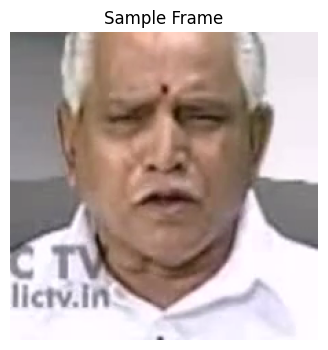

In [29]:
cap = cv2.VideoCapture(str(sample_filepath))

if not cap.isOpened():
    print(f"Error: Could not open video file {sample_filepath}")
else:
    #Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps if fps > 0 else 0

    print("\n--- Video Properties ---")
    print(f"Resolution: {width}x{height}")
    print(f"FPS: {fps:.2f}")
    print(f"Frame Count: {frame_count}")
    print(f"Duration (s): {duration:.2f}")

    # Read and display a sample frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, 10) #for example 10th frame
    ret, frame = cap.read()
    if ret:
        print("\nDisplaying sample frame (frame 10):")
        # Convert BGR (OpenCV default) to RGB for Matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5,4))
        plt.imshow(frame_rgb)
        plt.title("Sample Frame")
        plt.axis('off')
        plt.show()
    else:
        print("Could not read frame 10")

    cap.release() 
                  
    

Load Audio & Inspect: Use Librosa to load the audio from the same file and check its properties

In [30]:
import librosa
import librosa.display
import numpy as np


--- Audio Properties ---
Sampling Rate (Hz): 16000
Shape: (104320,)
Audio Duration (s): {audio_duration:.2f}
Number of Channels: 1

Plotting audio waveform (mono):


/var/folders/03/_qvm5lv56q17d6v3z0kkfz2h0000gn/T/ipykernel_3425/2991785539.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(str(sample_filepath), sr=None, mono=False)


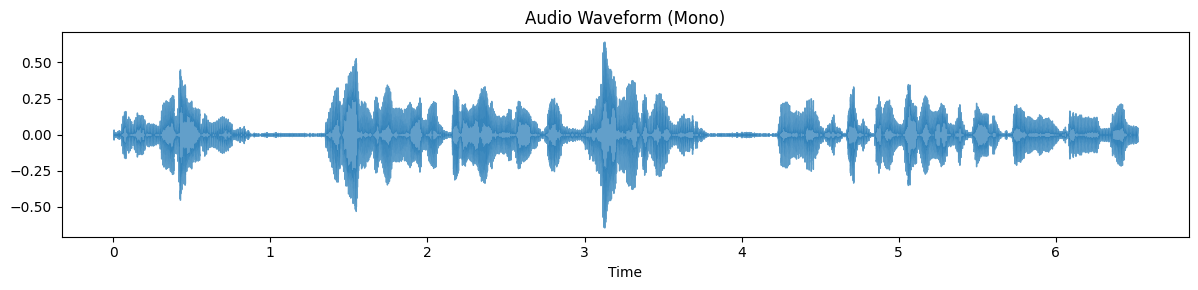

In [31]:
try:
    # Load audio - librosa handles finding the audio stream in the video file
    y, sr = librosa.load(str(sample_filepath), sr=None, mono=False)

    print("\n--- Audio Properties ---")
    print(f"Sampling Rate (Hz): {sr}")
    print(f"Shape: {y.shape}") # (channels, samples) if stereo, (samples,) if mono

    audio_duration = librosa.get_duration(y=y, sr=sr)
    print("Audio Duration (s): {audio_duration:.2f}")
    num_channels = y.shape[0] if y.ndim > 1 else 1
    print(f"Number of Channels: {num_channels}")

    # Convert to mono if stereo for plotting waveform
    if num_channels > 1:
        y_mono = librosa.to_mono(y)
    else:
        y_mono = y
        
    # Plot waveform
    print("\nPlotting audio waveform (mono):")
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y_mono, sr=sr, alpha=0.7)
    plt.title("Audio Waveform (Mono)")
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"\nError loading audio from {sample_filepath}: {e}")
    
    